In [1]:
### 导入依赖 ###
print(__doc__)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Automatically created module for IPython interactive environment


In [2]:
### 利用一个3分类问题，理解Confusion matrix 和 ROC curve #注意 pd.read_csv中sep参数的选择
y_pred = pd.read_csv('E:\\input\\y_predicted_label.csv',sep='\t')
y_test = pd.read_csv('E:\\input\\y_true.csv',sep='\t')
y_score = pd.read_csv('E:\\input\\y_predicted_score.csv',sep='\t')


In [3]:
y_pred

,class1,class2,class3
0,0,0,1
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,0
5,0,0,0
6,1,0,0
7,0,1,0
8,0,0,0
9,0,0,0


In [4]:
y_test

,class1,class2,class3
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,1,0
9,0,1,0


In [5]:
y_score

,class1,class2,class3
0,-0.763011,-0.364825,0.123864
1,-0.202245,-0.631444,-0.166123
2,0.118015,-0.802631,-0.320559
3,-0.907809,-0.123955,0.021998
4,-0.011162,-0.279135,-0.718892
5,-0.604873,-0.347305,-0.058590
6,0.022835,-0.245065,-0.791120
7,-0.610769,0.182649,-0.571994
8,-0.375728,-0.240595,-0.389337
9,-0.470174,-0.257451,-0.275108


In [6]:
###定义初始变量，请将fpr tpr rpc auc 定义成 dict型 ###
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}

In [7]:
# 利用一个简单循环 和 roc_curve 函数roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# 其中 y_true是 样本的真实标签
# y score 是 样本的预测得分
# 提示 利用pandas包 操作时 可以利用 pandas.iloc
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score.iloc[:, i]) #
    roc_auc[i] = auc(fpr[i], tpr[i])

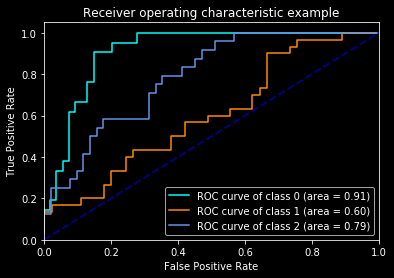

In [8]:
##利用循环 打印出上述fpr tpr 生成roc曲线
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
########################################
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
#将 one-hot标签 转化为 list形式的3值标签 pred_class已经给出 请对true_class作出
pred_class= []
for i in range(len(y_pred)):
    if y_pred.iloc[i,0] == 1:
        pred_class.append('label_1')
    if y_pred.iloc[i,1] == 1:
        pred_class.append('label_2')
    if y_pred.iloc[i,2] == 1:
        pred_class.append('label_3')
    if y_pred.iloc[i,0] == y_pred.iloc[i,1] == y_pred.iloc[i,2] == 0:
        pred_class.append('no_class')
pred_class

true_class= []
for i in range(len(y_test)):
    if y_test.iloc[i,0] == 1:
        true_class.append('label_1')
    if y_test.iloc[i,1] == 1:
        true_class.append('label_2')
    if y_test.iloc[i,2] == 1:
        true_class.append('label_3')


Text(0.5, 14.09375, 'Predicted label')

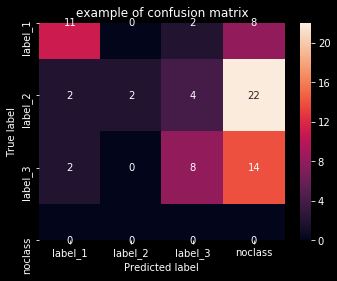

In [10]:
##利用confusion_matrix函数 生成混淆矩阵 confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]¶
cm = confusion_matrix(true_class, pred_class)
cm_df = pd.DataFrame(cm,
                     index = ['label_1','label_2','label_3','noclass'],
                     columns = ['label_1','label_2','label_3','noclass'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('example of confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [11]:
### 问题
### 上图中应该如何计算 以label1来看：TP=11 TN=2+4+22+8+14   FP=2+2   FN=2+8